<a href="https://colab.research.google.com/github/WahyuKhairi06/BigData_2311531009_Wahyu-Khairi/blob/main/Tugas%20Akhir%20Big%20Data/Naive_bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import kagglehub
rajatkumar30_fake_news_path = kagglehub.dataset_download('rajatkumar30/fake-news')

print('Data source import complete.')

Using Colab cache for faster access to the 'fake-news' dataset.
Data source import complete.


In [ ]:
import numpy as np
import pandas as pd

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/fake-news/news.csv


In [ ]:
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
import re, string
import warnings
warnings.filterwarnings('ignore')

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

Data distribution:
label
REAL    3154
FAKE    3152
Name: count, dtype: int64


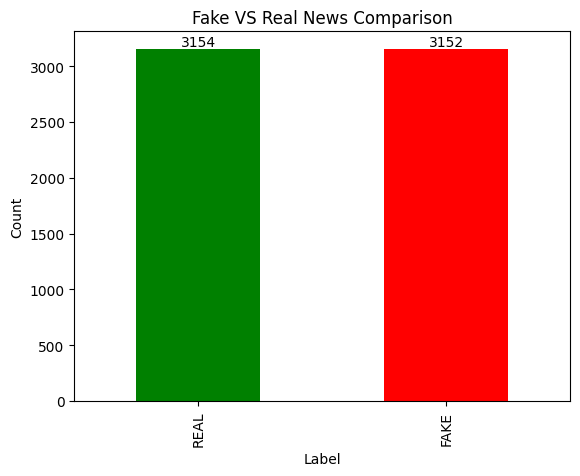

In [ ]:
df = pd.read_csv(rajatkumar30_fake_news_path + '/news.csv')

# Rename column
df.rename(columns = {'Unnamed: 0': 'ID'}, inplace = True)

# Remove duplicates
df = df.drop_duplicates(subset=['text','title'])

# Check data distribution
print("Data distribution:")
print(df['label'].value_counts())

# Bar chart Fake vs Real Comparison
bar = df['label'].value_counts().plot(kind='bar',color=['green','red'])
for i in bar.patches:
    bar.text(i.get_x() + i.get_width()/2,i.get_height() + 0.1,
            f'{int(i.get_height())}',
            ha='center',va='bottom')
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Fake VS Real News Comparison')
plt.show()

Preprocessing

In [ ]:
# Combine title and text
df['content'] = df['title'] + ' ' + df['text']

def clean_text(text):
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()
    # Tokenize and remove stopwords
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    filtered_text = [word for word in word_tokens if word not in stop_words]
    return ' '.join(filtered_text)

print("Cleaning text data...")
df['clean_content'] = df['content'].apply(clean_text)

label_encoder = LabelEncoder()
df['label_encoded'] = label_encoder.fit_transform(df['label'])
print("\nLabel encoding:")
print(df[['label', 'label_encoded']].value_counts())


Cleaning text data...

Label encoding:
label  label_encoded
REAL   1                3154
FAKE   0                3152
Name: count, dtype: int64


Feature Extraction: TF-IDF

In [ ]:
X = df['clean_content']
y = df['label_encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"\nTrain set size: {len(X_train)}")
print(f"Test set size: {len(X_test)}")

# Create TF-IDF features
print("\nCreating TF-IDF features...")
tfidf_vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1,2))
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

print(f"TF-IDF Train shape: {X_train_tfidf.shape}")
print(f"TF-IDF Test shape: {X_test_tfidf.shape}")


Train set size: 5044
Test set size: 1262

Creating TF-IDF features...
TF-IDF Train shape: (5044, 5000)
TF-IDF Test shape: (1262, 5000)


Modelling and Evaluating: Naive Bayes


NAIVE BAYES MODEL TRAINING

Model Performance:
Accuracy:  0.8788
Precision: 0.9051
Recall:    0.8463
F1-Score:  0.8747

Classification Report:
              precision    recall  f1-score   support

        FAKE       0.86      0.91      0.88       631
        REAL       0.91      0.85      0.87       631

    accuracy                           0.88      1262
   macro avg       0.88      0.88      0.88      1262
weighted avg       0.88      0.88      0.88      1262



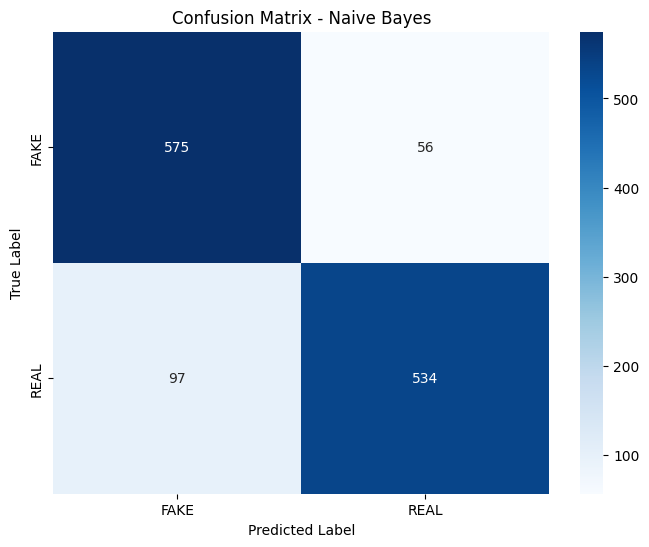

In [ ]:
print("="*50)
print("NAIVE BAYES MODEL TRAINING")
print("="*50)

nb_model = MultinomialNB(alpha=0.1)
nb_model.fit(X_train_tfidf, y_train)

y_pred = nb_model.predict(X_test_tfidf)
y_pred_prob = nb_model.predict_proba(X_test_tfidf)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"\nModel Performance:")
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1-Score:  {f1:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['FAKE', 'REAL']))

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['FAKE', 'REAL'],
            yticklabels=['FAKE', 'REAL'])
plt.title('Confusion Matrix - Naive Bayes')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [ ]:
print("="*50)
print("FEATURE IMPORTANCE ANALYSIS")
print("="*50)

feature_names = tfidf_vectorizer.get_feature_names_out()
log_prob = nb_model.feature_log_prob_

top_n = 20
print("\nTop features for FAKE news:")
fake_idx = np.argsort(log_prob[0])[-top_n:][::-1]
for i, idx in enumerate(fake_idx):
    print(f"{i+1:2d}. {feature_names[idx]:20s} - {log_prob[0][idx]:.4f}")

print("\nTop features for REAL news:")
real_idx = np.argsort(log_prob[1])[-top_n:][::-1]
for i, idx in enumerate(real_idx):
    print(f"{i+1:2d}. {feature_names[idx]:20s} - {log_prob[1][idx]:.4f}")


FEATURE IMPORTANCE ANALYSIS

Top features for FAKE news:
 1. trump                - -5.3119
 2. clinton              - -5.4114
 3. hillary              - -5.6091
 4. us                   - -5.7387
 5. people               - -5.9855
 6. election             - -6.0505
 7. one                  - -6.1552
 8. fbi                  - -6.1575
 9. would                - -6.1836
10. russia               - -6.1899
11. said                 - -6.2040
12. world                - -6.2245
13. hillary clinton      - -6.2553
14. new                  - -6.2689
15. october              - -6.3100
16. war                  - -6.3474
17. like                 - -6.3851
18. media                - -6.4417
19. government           - -6.4613
20. emails               - -6.4700

Top features for REAL news:
 1. trump                - -5.0360
 2. said                 - -5.2227
 3. clinton              - -5.4517
 4. obama                - -5.8586
 5. sanders              - -5.9446
 6. would                - -5.9863
 7.


VISUALISASI FEATURE IMPORTANCE


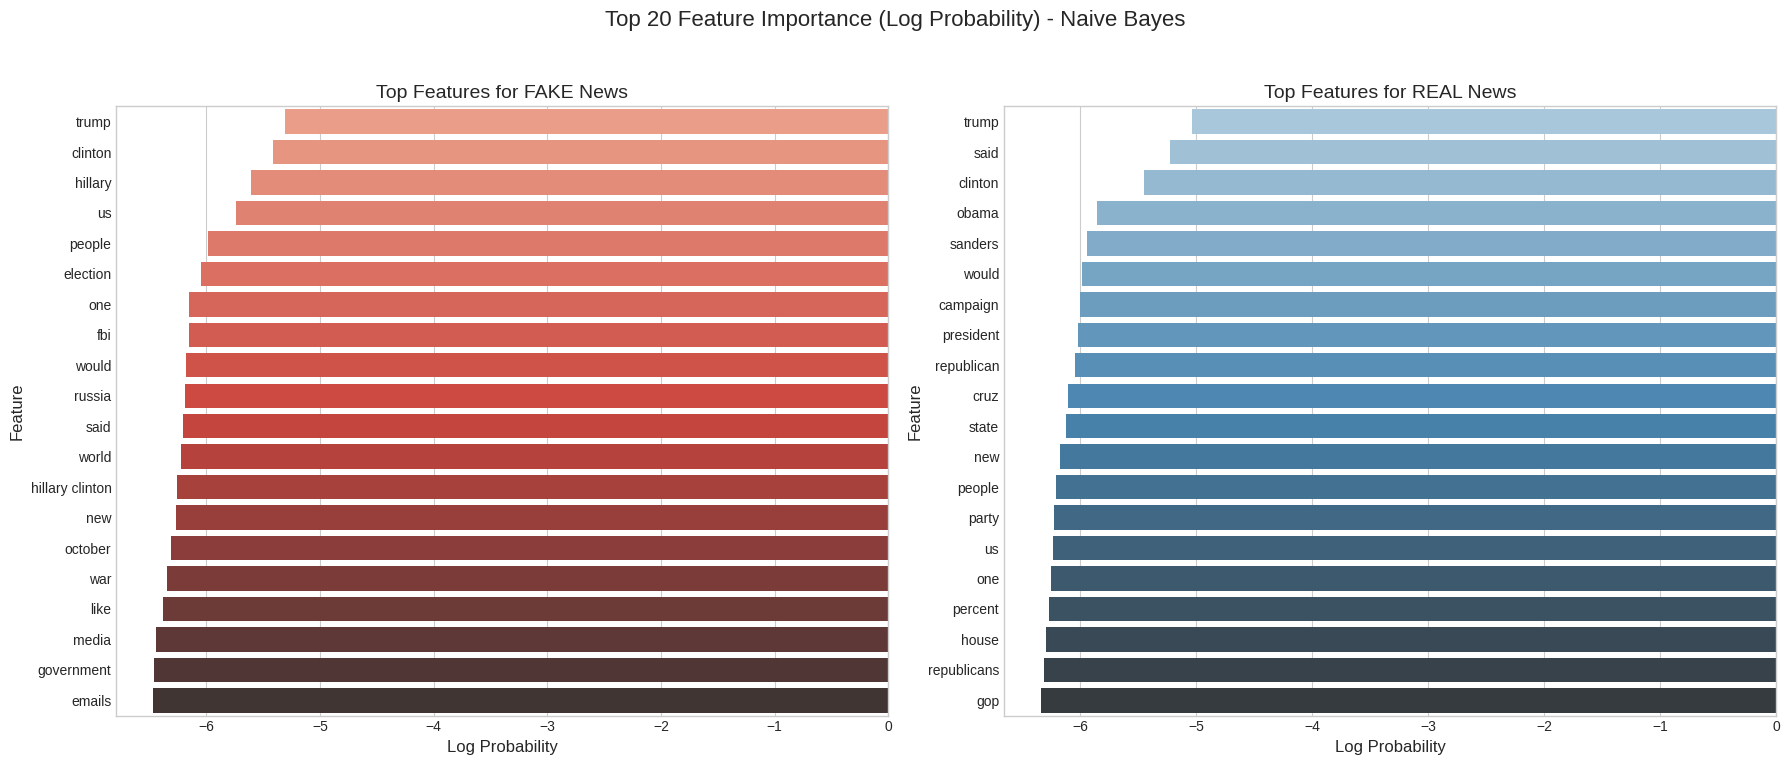

In [ ]:
plt.style.use('seaborn-v0_8-whitegrid')

print("\n" + "="*50)
print("VISUALISASI FEATURE IMPORTANCE")
print("="*50)

fake_features_data = []
for i, idx in enumerate(fake_idx):
    fake_features_data.append({'Feature': feature_names[idx], 'Log Probability': log_prob[0][idx]})
df_fake_features = pd.DataFrame(fake_features_data)

real_features_data = []
for i, idx in enumerate(real_idx):
    real_features_data.append({'Feature': feature_names[idx], 'Log Probability': log_prob[1][idx]})
df_real_features = pd.DataFrame(real_features_data)

fig, axes = plt.subplots(1, 2, figsize=(18, 8))
fig.suptitle('Top 20 Feature Importance (Log Probability) - Naive Bayes', fontsize=16)

# Bar chart for FAKE news features
sns.barplot(
    x='Log Probability',
    y='Feature',
    data=df_fake_features,
    ax=axes[0],
    palette='Reds_d'
)
axes[0].set_title('Top Features for FAKE News', fontsize=14)
axes[0].set_xlabel('Log Probability', fontsize=12)
axes[0].set_ylabel('Feature', fontsize=12)

# Bar chart for REAL news features
sns.barplot(
    x='Log Probability',
    y='Feature',
    data=df_real_features,
    ax=axes[1],
    palette='Blues_d'
)
axes[1].set_title('Top Features for REAL News', fontsize=14)
axes[1].set_xlabel('Log Probability', fontsize=12)
axes[1].set_ylabel('Feature', fontsize=12)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

Cross-Validation

In [ ]:
print("="*50)
print("CROSS-VALIDATION")
print("="*50)

from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(nb_model, X_train_tfidf, y_train, cv=5, scoring='accuracy')
print(f"\nCross-validation scores (5-fold): {cv_scores}")
print(f"Mean CV Accuracy: {cv_scores.mean():.4f} (+/- {cv_scores.std()*2:.4f})")


CROSS-VALIDATION

Cross-validation scores (5-fold): [0.88404361 0.89890981 0.87809713 0.88701685 0.87301587]
Mean CV Accuracy: 0.8842 (+/- 0.0176)


Hyperparameter Tuning

In [ ]:
print("="*50)
print("HYPERPARAMETER TUNING")
print("="*50)

from sklearn.model_selection import GridSearchCV

param_grid = {
    'alpha': [0.01, 0.1, 0.5, 1.0, 2.0, 5.0],
    'fit_prior': [True, False]
}

# Grid search
grid_search = GridSearchCV(
    MultinomialNB(),
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train_tfidf, y_train)

print(f"\nBest parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_:.4f}")

best_nb = grid_search.best_estimator_
best_nb.fit(X_train_tfidf, y_train)

y_pred_best = best_nb.predict(X_test_tfidf)
best_accuracy = accuracy_score(y_test, y_pred_best)

print(f"\nBest model test accuracy: {best_accuracy:.4f}")
print(f"Improvement: {(best_accuracy - accuracy):.4f}")


HYPERPARAMETER TUNING
Fitting 5 folds for each of 12 candidates, totalling 60 fits

Best parameters: {'alpha': 0.01, 'fit_prior': False}
Best cross-validation score: 0.8844

Best model test accuracy: 0.8811
Improvement: 0.0024


Error Analysis

In [ ]:
print("="*50)
print("ERROR ANALYSIS")
print("="*50)

results_df = pd.DataFrame({
    'True_Label': y_test.values,
    'Predicted_Label': y_pred,
    'Content': X_test.values
})

results_df['True_Label_Text'] = results_df['True_Label'].map({0: 'FAKE', 1: 'REAL'})
results_df['Predicted_Label_Text'] = results_df['Predicted_Label'].map({0: 'FAKE', 1: 'REAL'})

misclassified = results_df[results_df['True_Label'] != results_df['Predicted_Label']]
print(f"\nNumber of misclassified samples: {len(misclassified)} ({len(misclassified)/len(y_test)*100:.2f}%)")

print("\nExamples of misclassified news:")
for i, (idx, row) in enumerate(misclassified.head(5).iterrows()):
    print(f"\nExample {i+1}:")
    print(f"True Label: {row['True_Label_Text']}")
    print(f"Predicted: {row['Predicted_Label_Text']}")
    content_preview = row['Content'][:200] + "..." if len(row['Content']) > 200 else row['Content']
    print(f"Content Preview: {content_preview}")
    print("-" * 50)


ERROR ANALYSIS

Number of misclassified samples: 153 (12.12%)

Examples of misclassified news:

Example 1:
True Label: REAL
Predicted: FAKE
Content Preview: cuba possible lung cancer vaccine america test united states cuba taken major steps end years hostility researchers think americans could reap unexpected benefit better access cuban medical innovation...
--------------------------------------------------

Example 2:
True Label: REAL
Predicted: FAKE
Content Preview: profit sharing supposed silver bullet middleclass success happened core commitment american economy give workers fair share productivity profits created seriously question become abundantly clear last...
--------------------------------------------------

Example 3:
True Label: REAL
Predicted: FAKE
Content Preview: connecticut ’ highest court approves forced chemotherapy teen connecticut teenager tried reject lifesaving chemotherapy hodgkin ’ lymphoma forced undergo treatment anyway state ’ supreme court ruled t...
----

In [ ]:
print("\n" + "="*50)
print("ERROR ANALYSIS")
print("="*50)

results_df = pd.DataFrame({
    'True_Label': y_test.values,
    'Predicted_Label': y_pred,
    'Content': X_test.values
})

results_df['True_Label_Text'] = results_df['True_Label'].map({0: 'FAKE', 1: 'REAL'})
results_df['Predicted_Label_Text'] = results_df['Predicted_Label'].map({0: 'FAKE', 1: 'REAL'})

misclassified = results_df[results_df['True_Label'] != results_df['Predicted_Label']]
print(f"\nNumber of misclassified samples: {len(misclassified)} ({len(misclassified)/len(y_test)*100:.2f}%)")

print("\nExamples of misclassified news:")
for i, (idx, row) in enumerate(misclassified.head(5).iterrows()):
    print(f"\nExample {i+1}:")
    print(f"True Label: {row['True_Label_Text']}")
    print(f"Predicted: {row['Predicted_Label_Text']}")
    content_preview = row['Content'][:200] + "..." if len(row['Content']) > 200 else row['Content']
    print(f"Content Preview: {content_preview}")
    print("-" * 50)


ERROR ANALYSIS

Number of misclassified samples: 153 (12.12%)

Examples of misclassified news:

Example 1:
True Label: REAL
Predicted: FAKE
Content Preview: cuba possible lung cancer vaccine america test united states cuba taken major steps end years hostility researchers think americans could reap unexpected benefit better access cuban medical innovation...
--------------------------------------------------

Example 2:
True Label: REAL
Predicted: FAKE
Content Preview: profit sharing supposed silver bullet middleclass success happened core commitment american economy give workers fair share productivity profits created seriously question become abundantly clear last...
--------------------------------------------------

Example 3:
True Label: REAL
Predicted: FAKE
Content Preview: connecticut ’ highest court approves forced chemotherapy teen connecticut teenager tried reject lifesaving chemotherapy hodgkin ’ lymphoma forced undergo treatment anyway state ’ supreme court ruled t...
----

In [ ]:
print("\n" + "="*50)
print("MODEL SAVING")
print("="*50)

import joblib
import os

os.makedirs('models', exist_ok=True)

joblib.dump(best_nb, 'models/naive_bayes_model.pkl')
joblib.dump(tfidf_vectorizer, 'models/tfidf_vectorizer.pkl')
joblib.dump(label_encoder, 'models/label_encoder.pkl')

print("Model, vectorizer, and label encoder saved successfully!")


MODEL SAVING
Model, vectorizer, and label encoder saved successfully!


In [ ]:
def predict_news(text):
    cleaned_text = clean_text(text)

    text_tfidf = tfidf_vectorizer.transform([cleaned_text])

    prediction = best_nb.predict(text_tfidf)
    probability = best_nb.predict_proba(text_tfidf)

    label = label_encoder.inverse_transform(prediction)[0]

    return {
        'prediction': label,
        'probability_fake': probability[0][0],
        'probability_real': probability[0][1],
        'is_fake': label == 'FAKE'
    }

print("\n" + "="*50)
print("TEST PREDICTION")
print("="*50)

test_cases = [
    "Breaking news: Scientists discover new treatment for cancer that shows 95% success rate in trials.",
    "Aliens have landed in New York City and are taking over government buildings, says anonymous source.",
    "The president announced new economic policies aimed at reducing inflation and creating jobs."
]

for i, test_text in enumerate(test_cases):
    result = predict_news(test_text)
    print(f"\nTest Case {i+1}:")
    print(f"Text: {test_text[:100]}...")
    print(f"Prediction: {result['prediction']}")
    print(f"Probability (Fake): {result['probability_fake']:.4f}")
    print(f"Probability (Real): {result['probability_real']:.4f}")


TEST PREDICTION

Test Case 1:
Text: Breaking news: Scientists discover new treatment for cancer that shows 95% success rate in trials....
Prediction: FAKE
Probability (Fake): 0.9427
Probability (Real): 0.0573

Test Case 2:
Text: Aliens have landed in New York City and are taking over government buildings, says anonymous source....
Prediction: FAKE
Probability (Fake): 0.8859
Probability (Real): 0.1141

Test Case 3:
Text: The president announced new economic policies aimed at reducing inflation and creating jobs....
Prediction: REAL
Probability (Fake): 0.3852
Probability (Real): 0.6148


In [ ]:
# ==============================
# PERFORMANCE SUMMARY
# ==============================

print("\n" + "="*50)
print("PERFORMANCE SUMMARY")
print("="*50)

print(f"\nDataset Statistics:")
print(f"Total samples: {len(df)}")
print(f"Fake news: {len(df[df['label']=='FAKE'])}")
print(f"Real news: {len(df[df['label']=='REAL'])}")

print(f"\nModel Performance Summary:")
print(f"Initial Accuracy: {accuracy:.4f}")
print(f"Best Model Accuracy: {best_accuracy:.4f}")
print(f"Precision: {precision_score(y_test, y_pred_best):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_best):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_best):.4f}")

print("\n✓ Preprocessing completed successfully")
print("✓ Naive Bayes model trained and optimized")
print("✓ Model evaluation metrics calculated")
print("✓ Model saved for future use")


PERFORMANCE SUMMARY

Dataset Statistics:
Total samples: 6306
Fake news: 3152
Real news: 3154

Model Performance Summary:
Initial Accuracy: 0.8788
Best Model Accuracy: 0.8811
Precision: 0.9069
Recall: 0.8494
F1-Score: 0.8773

✓ Preprocessing completed successfully
✓ Naive Bayes model trained and optimized
✓ Model evaluation metrics calculated
✓ Model saved for future use
